# Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing the dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/FoDS-Assignment-2.csv')
df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price
0,4,1.75,2120.0,7420,1.0,0,0,4,7,1060.0,1060,1540,7420,453000.0
1,4,2.50,2180.0,9861,2.0,0,2,3,8,2180.0,0,2390,9761,480000.0
2,3,1.50,1540.0,9800,1.0,0,0,3,7,1010.0,530,1600,8250,180500.0
3,3,3.50,2380.0,6250,2.0,0,3,3,8,1670.0,710,2540,4010,495000.0
4,4,2.50,2230.0,8500,2.0,0,0,3,8,2230.0,0,2270,8770,325000.0


In [ ]:
#Checking for null values and dropping them
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188 entries, 0 to 1187
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       1188 non-null   int64  
 1   bathrooms      1188 non-null   float64
 2   sqft_living    1174 non-null   float64
 3   sqft_lot       1188 non-null   int64  
 4   floors         1175 non-null   float64
 5   waterfront     1188 non-null   int64  
 6   view           1188 non-null   int64  
 7   condition      1188 non-null   int64  
 8   grade          1188 non-null   int64  
 9   sqft_above     1174 non-null   float64
 10  sqft_basement  1188 non-null   int64  
 11  sqft_living15  1188 non-null   int64  
 12  sqft_lot15     1188 non-null   int64  
 13  price          1188 non-null   float64
dtypes: float64(5), int64(9)
memory usage: 130.1 KB


In [ ]:
#Filling the missing values with interpolated values
df = df.interpolate(method='linear',axis =0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188 entries, 0 to 1187
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       1188 non-null   int64  
 1   bathrooms      1188 non-null   float64
 2   sqft_living    1188 non-null   float64
 3   sqft_lot       1188 non-null   int64  
 4   floors         1188 non-null   float64
 5   waterfront     1188 non-null   int64  
 6   view           1188 non-null   int64  
 7   condition      1188 non-null   int64  
 8   grade          1188 non-null   int64  
 9   sqft_above     1188 non-null   float64
 10  sqft_basement  1188 non-null   int64  
 11  sqft_living15  1188 non-null   int64  
 12  sqft_lot15     1188 non-null   int64  
 13  price          1188 non-null   float64
dtypes: float64(5), int64(9)
memory usage: 130.1 KB


In [ ]:
df.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price
count,1188.000000,1188.000000,1188.000000,1.188000e+03,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1.188000e+03
mean,3.382997,2.143098,2123.372896,1.579757e+04,1.510101,0.003367,0.245791,3.425926,7.687710,1814.976852,304.373737,2019.319865,12889.924242,5.524078e+05
std,0.930045,0.779664,961.723113,6.174847e+04,0.537361,0.057953,0.768059,0.658354,1.175121,856.086733,457.131093,686.068063,26913.741656,3.853805e+05
min,1.000000,0.500000,550.000000,6.960000e+02,1.000000,0.000000,0.000000,2.000000,5.000000,550.000000,0.000000,710.000000,942.000000,1.100000e+05
25%,3.000000,1.750000,1450.000000,5.198500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1510.000000,5178.250000,3.297125e+05
50%,3.000000,2.250000,1950.000000,7.687000e+03,1.500000,0.000000,0.000000,3.000000,8.000000,1590.000000,0.000000,1880.000000,7665.000000,4.621850e+05
75%,4.000000,2.500000,2630.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2250.375000,580.000000,2439.250000,10075.750000,6.623750e+05
max,8.000000,6.000000,9200.000000,1.651359e+06,3.000000,1.000000,4.000000,5.000000,13.000000,6640.000000,3000.000000,5790.000000,425581.000000,5.570000e+06


In [ ]:
fig, axs = plt.subplots(13,figsize=(15,45))
for i in range(len(df.columns)):
    axs[i-1].boxplot(df[df.columns[i]])
    axs[i-1].set_title(df.columns[i])

In [ ]:
# Using the interquartile range for the outliers
highest_allowed = []
lowest_allowed = []

for i in df.columns:
    highest_allowed.append(df[i].mean() + 3*df[i].std())
    lowest_allowed.append(df[i].mean() - 3*df[i].std())
print(highest_allowed)
print(lowest_allowed)
    # print("Highest allowed",df[i].mean() + 3*df[i].std())
    # print("Lowest allowed",df[i].mean() - 3*df[i].std())

[6.173132825539785, 4.482089067037499, 5008.5422346388805, 201042.97398773336, 3.122182631251497, 0.17722453996474422, 2.5499687285380093, 5.400988087474918, 11.213074681442079, 4383.2370519420165, 1675.767015008668, 4077.5240543213094, 93631.14920916248, 1708549.3849483298]
[0.5928604404534803, -0.19589378084221298, -761.7964433930897, -169447.837624097, -0.10198061104947631, -0.17049053323073746, -2.058386236955518, 1.4508637643769347, 4.162346193978797, -753.2833482383123, -1067.0195402611932, -38.88432368157851, -67851.300724314, -603733.8293927743]


In [ ]:
non_class_cols = df.columns[df.max() >15]
class_cols = df.columns[df.max() <15]
df1 = df.copy()
for i in non_class_cols:
  df1 = df1[df1[i] < df1[i].quantile(0.98)]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1029 entries, 0 to 1187
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       1029 non-null   int64  
 1   bathrooms      1029 non-null   float64
 2   sqft_living    1029 non-null   float64
 3   sqft_lot       1029 non-null   int64  
 4   floors         1029 non-null   float64
 5   waterfront     1029 non-null   int64  
 6   view           1029 non-null   int64  
 7   condition      1029 non-null   int64  
 8   grade          1029 non-null   int64  
 9   sqft_above     1029 non-null   float64
 10  sqft_basement  1029 non-null   int64  
 11  sqft_living15  1029 non-null   int64  
 12  sqft_lot15     1029 non-null   int64  
 13  price          1029 non-null   float64
dtypes: float64(5), int64(9)
memory usage: 120.6 KB


In [ ]:
fig, axs = plt.subplots(13,figsize=(15,45))
for i in range(len(df1.columns)):
    axs[i-1].boxplot(df1[df1.columns[i]])
    axs[i-1].set_title(df1.columns[i])

In [ ]:
norm_data = normalize_data(df1)
norm_data.mean()

bedrooms         3.294461e+00
bathrooms        2.017979e+00
sqft_living      1.508350e-16
sqft_lot        -5.220692e-17
floors           1.483965e+00
waterfront       1.943635e-03
view             1.778426e-01
condition        3.425656e+00
grade            7.480078e+00
sqft_above       1.638901e-16
sqft_basement   -6.193081e-17
sqft_living15   -1.109144e-16
sqft_lot15       6.383243e-17
price            3.213482e-01
dtype: float64

In [ ]:
norm_data.to_csv("/content/drive/MyDrive/clean_data_fods2.csv")

# Functions

In [ ]:
def normalize_data(df1):
  non_class_cols = df1.columns[df.max() >15]
  class_cols = df1.columns[df.max() <15]
  norm_data = (df1[non_class_cols] - df1[non_class_cols].mean(axis=0))/df1[non_class_cols].std(axis=0)
  norm_data[class_cols] = df1[class_cols]
  norm_data['price'] = (df1['price'] - df1['price'].min())/(df1['price'].max()-df1['price'].min())
  norm_data = norm_data[df1.columns]

  return norm_data

In [ ]:
def init_param_forward(X,Xtest,feature,Xt,Xte):
  xtrain = np.hstack((Xt, X[:,feature].reshape(-1,1)))
  xtest = np.hstack((Xte, Xtest[:,feature].reshape(-1,1)))
  w = np.random.rand(xtrain.shape[1],1)
  return xtrain,xtest, w

In [ ]:
def init_param_backward(Xt, Xte, feature):
  xtrain = np.delete(Xt, feature,1)
  xtest = np.delete(Xte, feature,1)
  w = np.random.rand(xtrain.shape[1],1)
  return xtrain,xtest,w

In [ ]:
def compute_cost(yhat, y):

  J =  np.sum(((yhat - y)**2))/(2*y.shape[0])

  return J

In [ ]:
def gradient_descent(X, y, w, learning_rate, n_iters):
    J_history = np.zeros((n_iters,1))

    for i in range(n_iters):
      J_history[i] = compute_cost(X@w, y)
      w = w - (learning_rate/X.shape[0]) * X.T @ (X @ w - y) 
        
    return (J_history, w)

In [ ]:
def train_test_split(data, test_size=0.7):
  shuffle_df = data.sample(frac=1)
  train_size = int(test_size * len(data))

  train_set = shuffle_df[:train_size]
  test_set = shuffle_df[train_size:]

  X_train = train_set.iloc[:,:-1].to_numpy()
  y_train = train_set.iloc[:,-1].to_numpy().reshape(-1,1)

  X_test = test_set.iloc[:,:-1].to_numpy()
  y_test = test_set.iloc[:,-1].to_numpy().reshape(-1,1)

  return X_train, y_train, X_test, y_test

# Feature selection

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/clean_data_fods2.csv")
data.drop('Unnamed: 0', axis=1,inplace=True)
data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price
0,4,1.75,0.321273,-0.174097,1.0,0,0,4,7,-0.893059,2.128945,-0.624715,-0.135822,0.303540
1,4,2.50,0.409421,0.140314,2.0,0,2,3,8,0.800405,-0.674776,0.933519,0.264654,0.327434
2,3,1.50,-0.530824,0.132457,1.0,0,0,3,7,-0.968660,0.727085,-0.514722,0.006166,0.062389
3,3,3.50,0.703248,-0.324797,2.0,0,3,3,8,0.029274,1.203188,1.208501,-0.719174,0.340708
4,4,2.50,0.482878,-0.034988,2.0,0,0,3,8,0.876006,-0.674776,0.713533,0.095123,0.190265


In [ ]:
X_train, y_train, X_test, y_test = train_test_split(data)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(720, 13) (720, 1) (309, 13) (309, 1)


### Greedy forward feature selection

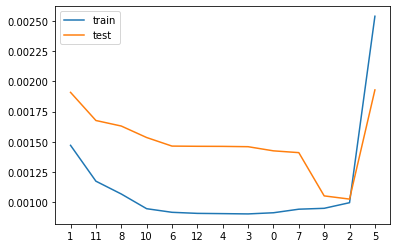

In [ ]:
feats = list(range(X_train.shape[1]))
minJ_train = {}
minJ_test = {}
for i in range(X_train.shape[1]):
  min_rms = 10**12
  fwin = 0

  for f in feats:
    if(i==0):
      xtrain = X_train[:, f].reshape(-1,1)
      xtest = X_test[:,f].reshape(-1,1)
      w = np.random.rand(xtrain.shape[1],1)
    else:
      xtrain, xtest, w = init_param_forward(X_train, X_test, f, Xt,Xte)
    J_history, w = gradient_descent(xtrain, y_train, w, 0.01, 5000)

    if(compute_cost(xtest@w,y_test) < min_rms):
      min_rms = compute_cost(xtest@w, y_test)
      min_rms_test = J_history[-1]
      fwin = f

  if(i == 0):
    Xt = X_train[:,fwin].reshape(-1,1)
    Xte = X_test[:,fwin].reshape(-1,1)
  else:
    Xt = np.hstack((Xt, X_train[:,fwin].reshape(-1,1)))
    Xte = np.hstack((Xte, X_test[:,fwin].reshape(-1,1)))

  minJ_train[str(fwin)] = float(min_rms)
  minJ_test[str(fwin)] = float(min_rms_test)
  feats.remove(fwin)
plt.plot(list(minJ_train.keys()), list(minJ_train.values()))
plt.plot(list(minJ_test.keys()), list(minJ_test.values()))
plt.legend(['train','test'])

### Greedy backward feature selection


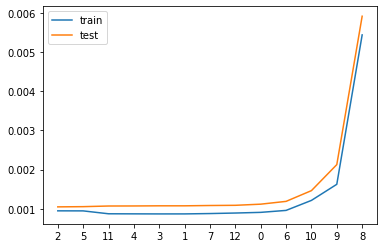

In [ ]:
feats = list(range(X_train.shape[1]))
Xt = X_train.copy()
Xte = X_test.copy()
minJ_train = {}
minJ_test = {}
for i in range(X_train.shape[1]):
  min_rms = 10**12
  fdrop = 0

  for f in range(len(feats)):
    xtrain,xtest, w = init_param_backward(Xt,Xte, f)
    J_history, w = gradient_descent(xtrain, y_train, w, 0.01, 5000)
    if(compute_cost(xtest@w, y_test) < min_rms):
      min_rms = compute_cost(xtest@w, y_test)
      min_rms_test = J_history[-1]
      fdrop = feats[f]

  Xt = np.delete(Xt, feats.index(fdrop), 1)
  Xte = np.delete(Xte, feats.index(fdrop), 1)

  minJ_train[str(fdrop)] = float(min_rms)
  minJ_test[str(fdrop)] = float(min_rms_test)
  feats.remove(fdrop)

plt.plot(list(minJ_train.keys()), list(minJ_train.values()))
plt.plot(list(minJ_test.keys()), list(minJ_test.values()))
plt.legend(['train','test'])

# No feature selection or preprocessing

In [ ]:
testdf = normalize_data(df)

In [ ]:
X_train, y_train, X_test, y_test = train_test_split(testdf)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(831, 13) (831, 1) (357, 13) (357, 1)


In [ ]:
w = np.random.rand(X_train.shape[1], 1)
J_history, w = gradient_descent(X_train, y_train, w, 0.01, 5000)
print(J_history[-1])
compute_cost(X_test@w, y_test)

[0.00200106]


0.0016582628913315045